In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from dataclasses import dataclass
from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]
sns.set_style('whitegrid', {'axes.labelcolor': '0', "text.color": '0', 'xtick.color': '0', 'ytick.color': '0', 'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],})
sns.set_context('notebook', font_scale=1)

### A quick look at 7-day mean/95% CI new cases

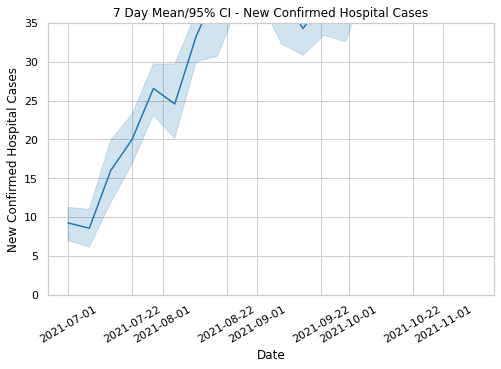

In [3]:
rdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
rdf.Date = rdf.Date.dt.round('7D')
ax=sns.lineplot(data=rdf, x='Date', y='HospitalCases')
ax.set_ylim((0,35))
ax.set_title('7 Day Mean/95% CI - New Confirmed Hospital Cases')
ax.set_ylabel('New Confirmed Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_ci95.png', bbox_inches='tight')

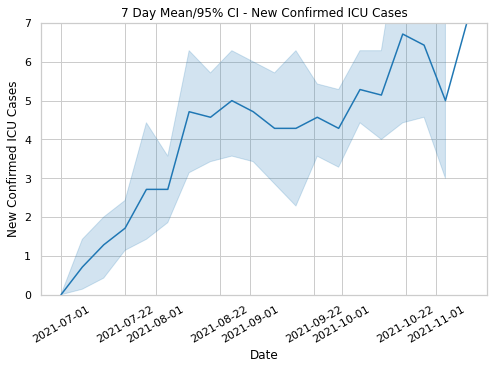

In [4]:
ax=sns.lineplot(data=rdf, x='Date', y='IcuCases')
ax.set_ylim((0,7))
ax.set_title('7 Day Mean/95% CI - New Confirmed ICU Cases')
ax.set_ylabel('New Confirmed ICU Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_ci95.png', bbox_inches='tight')

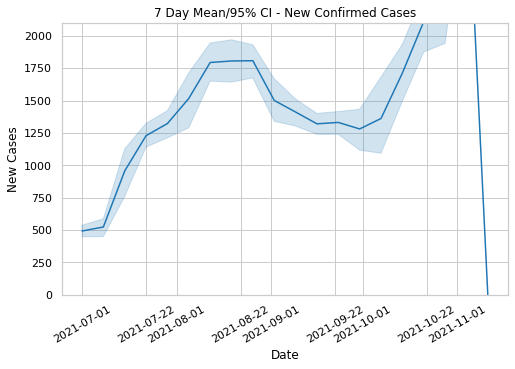

In [5]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

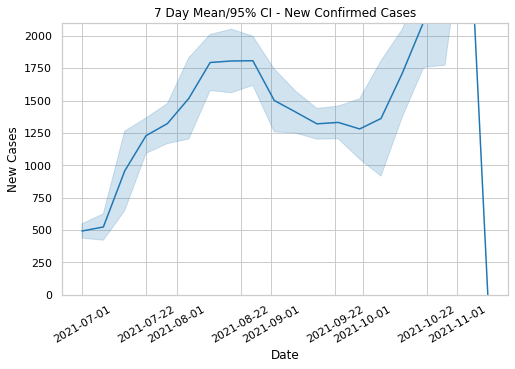

In [6]:
ax=sns.lineplot(data=rdf, x='Date', y='Cases', ci='sd')
ax.set_ylim((0,2100))
ax.set_title('7 Day Mean/95% CI - New Confirmed Cases')
ax.set_ylabel('New Cases')
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_cases_7d_mean_ci95.png', bbox_inches='tight')

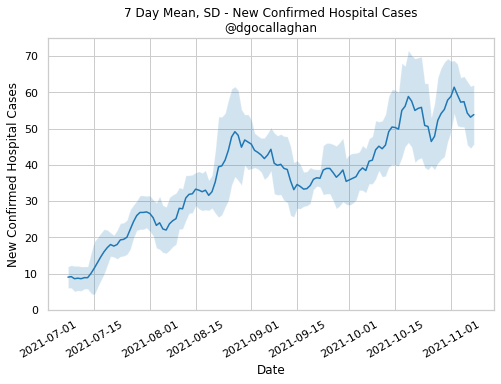

In [7]:
mdf=pd.read_csv('./data/reportedcases.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
mdf['7dhosp']=mdf.HospitalCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dhosp')
ax.set_ylim((0,75))
ax.set_title('7 Day Mean, SD - New Confirmed Hospital Cases\n@dgocallaghan')
ax.set_ylabel('New Confirmed Hospital Cases')
hospstd = mdf.HospitalCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dhosp'] - hospstd, mdf['7dhosp'] + hospstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

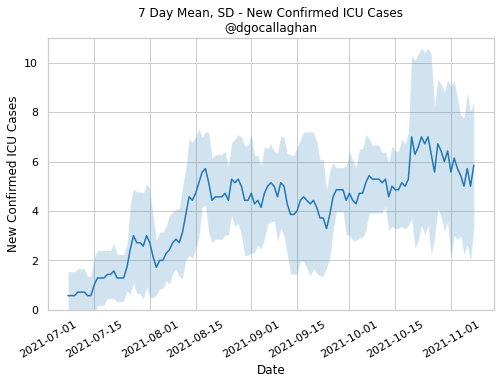

In [8]:
mdf['7dicu']=mdf.IcuCases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dicu')
ax.set_ylim((0,11))
ax.set_title('7 Day Mean, SD - New Confirmed ICU Cases\n@dgocallaghan')
ax.set_ylabel('New Confirmed ICU Cases')
icustd = mdf.IcuCases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dicu'] - icustd, mdf['7dicu'] + icustd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean_sd.png', bbox_inches='tight')

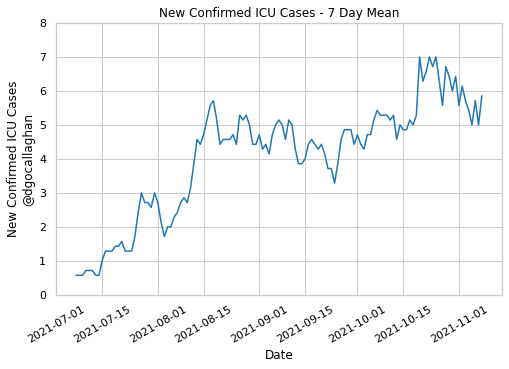

In [9]:
ax=sns.lineplot(data=mdf, x='Date', y='7dicu')
ax.set_ylim((0,8))
ax.set_title('New Confirmed ICU Cases - 7 Day Mean')
ax.set_ylabel('New Confirmed ICU Cases\n@dgocallaghan')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_icu_7d_mean.png', bbox_inches='tight')

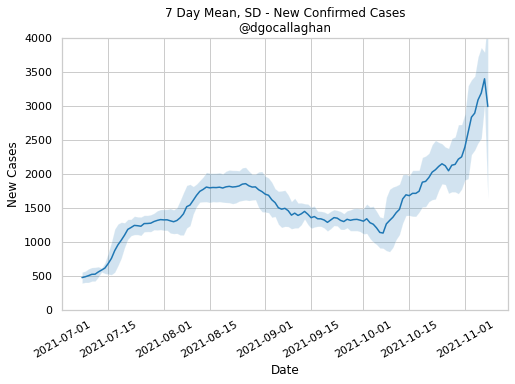

In [10]:
mdf['7dcases']=mdf.Cases.rolling(7).mean().dropna()
ax=sns.lineplot(data=mdf, x='Date', y='7dcases')
ax.set_ylim((0,4000))
ax.set_title('7 Day Mean, SD - New Confirmed Cases\n@dgocallaghan')
ax.set_ylabel('New Cases')
casesstd = mdf.Cases.rolling(7).std()
ax.fill_between(mdf.Date, mdf['7dcases'] - casesstd, mdf['7dcases'] + casesstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_cases_7d_mean_sd.png', bbox_inches='tight')

### A quick look at the percentage of Confirmed Hospital Cases that are **non-admission**

Uses a daily snapshot of:

* [Covid-19 Acute Hospital Historic Summary](https://covid-19.geohive.ie/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/explore?location=53.385818%2C-8.057012%2C7.64&showTable=true) ([CSV](https://opendata.arcgis.com/api/v3/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0/downloads/data?format=csv&spatialRefId=4326))

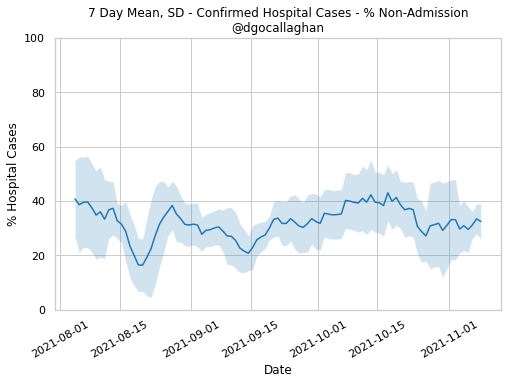

In [11]:
hdf=pd.read_csv('./data/Covid19AcuteHospitalHistoricSummaryOpenData.csv', parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y/%m/%d %H:00:00+00"))
hdf=hdf[hdf.Date>='2021-07-01'][['Date', 'SUM_no_new_admissions_covid19_p', 'SUM_no_discharges_covid19_posit', 'SUM_number_of_new_covid_19_cases_co']].dropna()
hdf['perc_nonadmiss']=hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].dropna().apply(lambda x:((x[1]-x[0])*100)/x[1], axis=1)
hdf['7dperc']=hdf.perc_nonadmiss.rolling(7).mean().dropna()
ax=sns.lineplot(data=hdf, x='Date', y='7dperc')
ax.set_ylim((0,100))
ax.set_title('7 Day Mean, SD - Confirmed Hospital Cases - % Non-Admission\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
percstd = hdf.perc_nonadmiss.rolling(7).std()
ax.fill_between(hdf.Date, hdf['7dperc'] - percstd, hdf['7dperc'] +percstd, alpha=0.2)
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

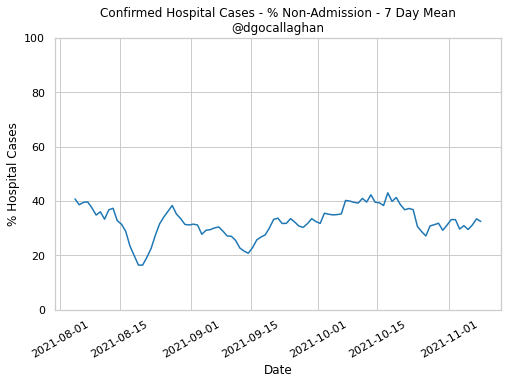

In [12]:
ax=sns.lineplot(data=hdf, x='Date', y='7dperc')
ax.set_ylim((0,100))
ax.set_title('Confirmed Hospital Cases - % Non-Admission - 7 Day Mean\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosppercnonadmission_7d_mean.png', bbox_inches='tight')

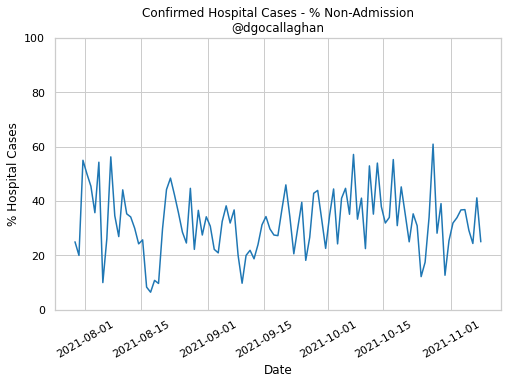

In [13]:
ax=sns.lineplot(data=hdf, x='Date', y='perc_nonadmiss')
ax.set_ylim((0,100))
ax.set_title('Confirmed Hospital Cases - % Non-Admission\n@dgocallaghan')
ax.set_ylabel('% Hospital Cases')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_perc_nonadmiss.png', bbox_inches='tight')

In [14]:
hdf.perc_nonadmiss.describe()

count    103.000000
mean      32.337975
std       11.657218
min        6.451613
25%       24.780702
50%       32.500000
75%       38.648897
max       60.937500
Name: perc_nonadmiss, dtype: float64

In [15]:
hdf[['SUM_no_new_admissions_covid19_p', 'SUM_number_of_new_covid_19_cases_co']].sum()

SUM_no_new_admissions_covid19_p        2876.0
SUM_number_of_new_covid_19_cases_co    4303.0
dtype: float64

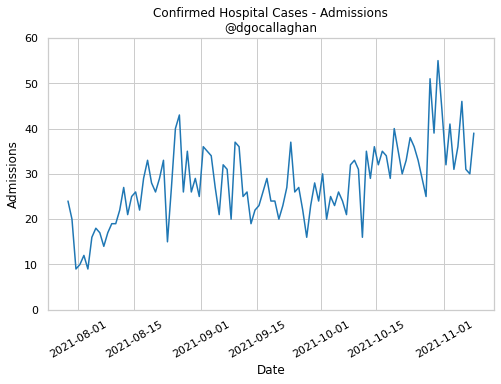

In [16]:
ax=sns.lineplot(data=hdf, x='Date', y='SUM_no_new_admissions_covid19_p')
ax.set_ylim((0,60))
ax.set_title('Confirmed Hospital Cases - Admissions\n@dgocallaghan')
ax.set_ylabel('Admissions')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_admissions.png', bbox_inches='tight')

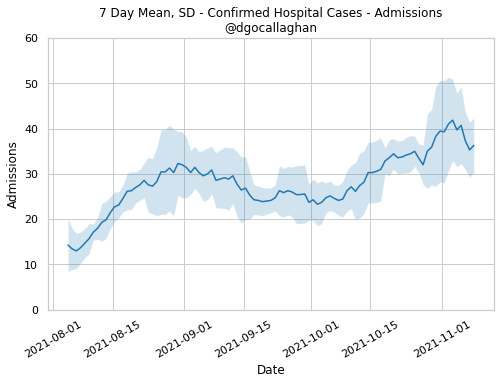

In [17]:
hdf['7dadmissions']=hdf.SUM_no_new_admissions_covid19_p.rolling(7).mean().dropna()
ax=sns.lineplot(data=hdf, x='Date', y='7dadmissions')
ax.set_ylim((0,60))
ax.set_title('7 Day Mean, SD - Confirmed Hospital Cases - Admissions\n@dgocallaghan')
ax.set_ylabel('Admissions')
admissionsstd = hdf.SUM_no_new_admissions_covid19_p.rolling(7).std()
ax.fill_between(hdf.Date, hdf['7dadmissions'] - admissionsstd, hdf['7dadmissions'] + admissionsstd, alpha=0.2)
plt.xticks(rotation=30);
#plt.savefig(f'./figures/reported_hosp_7d_mean_sd.png', bbox_inches='tight')

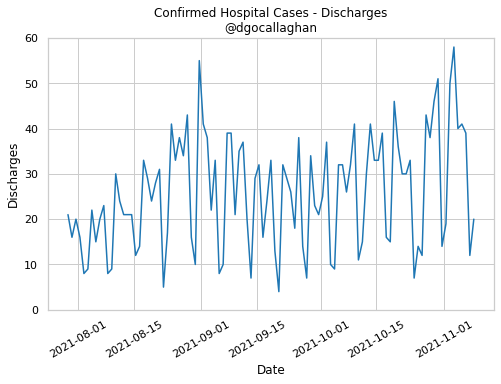

In [18]:
ax=sns.lineplot(data=hdf, x='Date', y='SUM_no_discharges_covid19_posit')
ax.set_ylim((0,60))
ax.set_title('Confirmed Hospital Cases - Discharges\n@dgocallaghan')
ax.set_ylabel('Discharges')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_discharges.png', bbox_inches='tight')

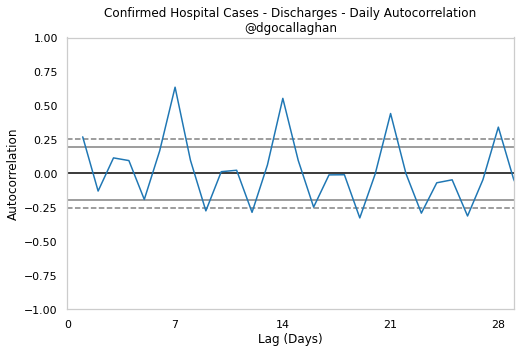

In [19]:
ax = pd.plotting.autocorrelation_plot(hdf.SUM_no_discharges_covid19_posit)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Discharges - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

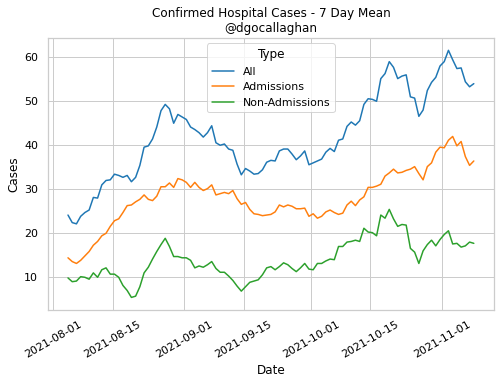

In [20]:
hdf = hdf.rename(columns={'SUM_number_of_new_covid_19_cases_co': 'All', 'SUM_no_new_admissions_covid19_p': 'Admissions'})
hdf['Non-Admissions'] = hdf.All - hdf.Admissions
meanhdf = hdf.copy(deep=True)
meanhdf.All = meanhdf.All.rolling(7).mean().dropna()
meanhdf.Admissions = meanhdf.Admissions.rolling(7).mean().dropna()
meanhdf['Non-Admissions'] = meanhdf['Non-Admissions'].rolling(7).mean().dropna()
ax=sns.lineplot(data=pd.melt(meanhdf[['Date', 'All', 'Admissions', 'Non-Admissions']], id_vars='Date', var_name='Type', value_name='Cases'), x='Date', y='Cases', hue='Type')
ax.set_title('Confirmed Hospital Cases - 7 Day Mean\n@dgocallaghan')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_casetypes.png', bbox_inches='tight')

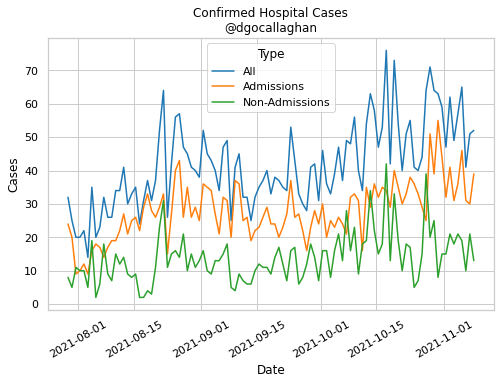

In [21]:
ax=sns.lineplot(data=pd.melt(hdf[['Date', 'All', 'Admissions', 'Non-Admissions']], id_vars='Date', var_name='Type', value_name='Cases'), x='Date', y='Cases', hue='Type')
ax.set_title('Confirmed Hospital Cases\n@dgocallaghan')
plt.xticks(rotation=30);
plt.savefig(f'./figures/reported_hosp_casetypes_daily.png', bbox_inches='tight')

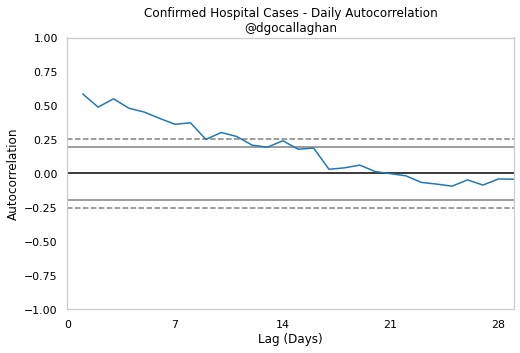

In [22]:
ax = pd.plotting.autocorrelation_plot(hdf.All)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

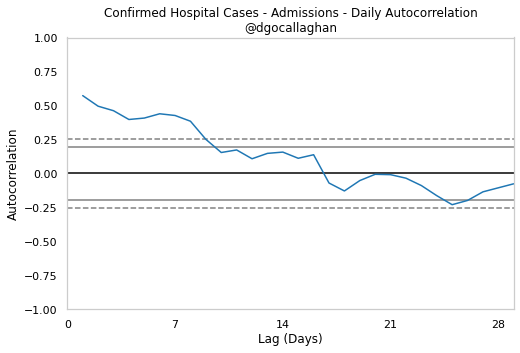

In [23]:
ax = pd.plotting.autocorrelation_plot(hdf.Admissions)
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Admissions - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');

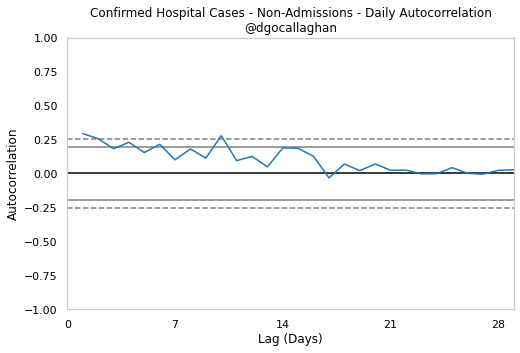

In [24]:
ax = pd.plotting.autocorrelation_plot(hdf['Non-Admissions'])
ax.set_xlim([0, 29]);
ax.set_xticks(range(0, 35, 7))
ax.set_title('Confirmed Hospital Cases - Non-Admissions - Daily Autocorrelation\n@dgocallaghan')
ax.set_xlabel('Lag (Days)');